In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

In [2]:
nside = 1024
nlev_t = 1.0

In [3]:
slm = np.load("/Users/omard/Downloads/SCRATCHFOLDER/n32/S4WebskyWebskyBorn/lenscarfrecs/ptt_bh_s_sim0000bh/normalized_s_slm_it000.npy")
smap = hp.alm2map(slm, nside)

In [6]:
tlm = hp.read_alm("/Users/omard/Downloads/SCRATCHFOLDER/n32/S4WebskyWebskyBorn/cmbs/sim_0000_tlm.fits")
tmap = hp.alm2map(tlm, nside)

In [4]:
fconv = 180*60/np.pi
fconv = fconv**2.
pixarea = hp.nside2pixarea(nside)
pixarea *= fconv
invtotalnoise = np.array([np.nan_to_num(pixarea/nlev_t**2.)])
invtotalnoise = np.ones_like(smap)*np.nan_to_num(pixarea/nlev_t**2.)

In [5]:
lmax = 3*nside-1
beam = hp.gauss_beam(1./60*np.pi/180, lmax = lmax)

I want to check if $(N+B^t S B)(N^{-1}-N^{-1}B^t S B N^{-1}) \sim I$

In [7]:
temp = tmap*invtotalnoise
temp_alm = hp.map2alm(temp, lmax = lmax)
temp_alm = hp.almxfl(temp_alm, beam)
temp = hp.alm2map(temp_alm, nside)
temp *= smap
temp_alm = hp.map2alm(temp, lmax = lmax)
temp_alm = hp.almxfl(temp_alm, beam)
temp = hp.alm2map(temp_alm, nside)
temp *= invtotalnoise
B = temp.copy()

A = tmap*invtotalnoise

In [8]:
result = A-B

In [17]:
result_alm = hp.map2alm(result, lmax = lmax)
result_alm = hp.almxfl(result_alm, beam)
resultS = hp.alm2map(result_alm, nside)
resultS *= smap
result_alm = hp.map2alm(resultS, lmax = lmax)
result_alm = hp.almxfl(result_alm, beam)
resultS = hp.alm2map(result_alm, nside)

In [18]:
resultN = result*invtotalnoise**-1.

In [19]:
resultTot = resultS+resultN

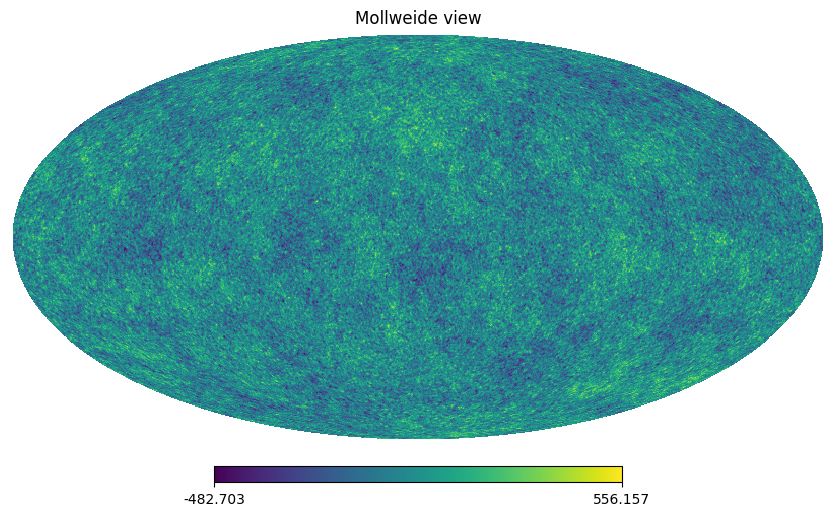

In [20]:
hp.mollview(resultTot)

In [21]:
resultTot_alm = hp.map2alm(resultTot, lmax = lmax)

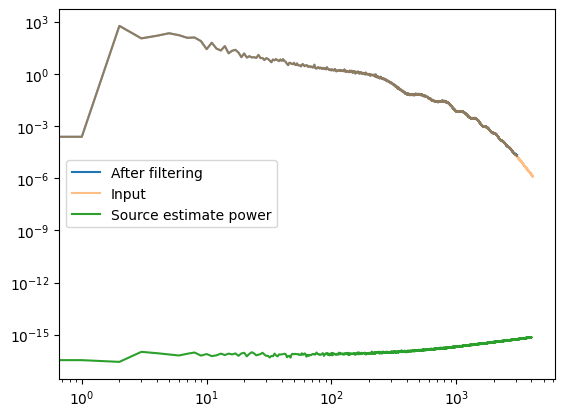

In [28]:
plt.loglog(hp.alm2cl(resultTot_alm), label = "After filtering")
plt.loglog(hp.alm2cl(tlm), label = "Input", alpha = 0.5)
plt.loglog(hp.alm2cl(slm), label = "Source estimate power")
plt.legend()

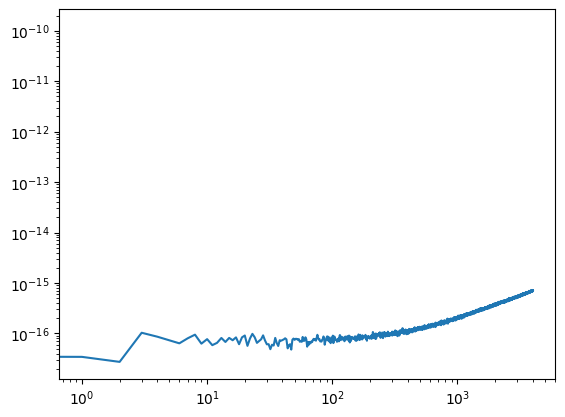

In [29]:
plt.loglog(hp.alm2cl(slm), label = "Source estimate power")